In [72]:
%run libaries.py
from functions import *

df = pd.read_csv('../DataDiabetes/train_c.csv')
df_test = pd.read_csv('../DataDiabetes/test_c.csv')

# *Opdracht 1 Exploratieve data analyse*

## <font color='grey'> 1.1 Voldoet de data aan de vereisten voor Machine Learning?

De minimale vereisten zijn als volgt: 
- De waarden in het dataframe moeten numeriek zijn.
- Er mogen geen missende waarden zijn in het dataframe. 
- De datastructuur moeten over het hele project hetzelfde zijn en gestructureerd.   

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   p_id                      614 non-null    int64  
 1   Pregnancies               614 non-null    int64  
 2   Glucose                   614 non-null    int64  
 3   BloodPressure             614 non-null    int64  
 4   SkinThickness             614 non-null    int64  
 5   Insulin                   614 non-null    int64  
 6   BMI                       614 non-null    float64
 7   DiabetesPedigreeFunction  614 non-null    float64
 8   Age                       614 non-null    int64  
 9   Outcome                   614 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 48.1 KB


Zoals je hierboven ziet voldoen we aan alle eisen. We hebben een bestand wat gelijkvormig is, geen missende waarden heeft en alleen numerieke datatypes heeft.

## <font color='grey'> 1.2 De datatypes en basisstatistieken van iedere kolom.

We hebben twee verschillende datatypen. We hebben **int64** (dit zijn gehele getallen) en **float64** (dit zijn decimale getallen). 
Hieronder zie je de <a id="basisstatistieken">basisstatistieken</a> van de dataframe

In [3]:
df.drop('p_id', axis=1).describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.809446,120.465798,68.903909,20.456026,81.250814,31.929642,0.468096,33.265472,0.342020
std,3.375544,31.959619,19.933385,16.063105,116.947384,8.136791,0.329203,11.851427,0.474773
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.400000,0.238000,24.000000,0.000000
50%,3.000000,115.000000,72.000000,23.000000,27.000000,32.150000,0.365500,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,130.000000,36.500000,0.628500,41.000000,1.000000
max,15.000000,197.000000,114.000000,99.000000,744.000000,67.100000,2.420000,72.000000,1.000000


Hierboven zien we basisstatistieken van de features. We hebben de **p_id** kolom weggehaald omdat het slechts indices zijn. We zien hier wel wat opvallendheden zo zien we bijvoorbeeld dat er mensen zijn die een **BloodPressure** hebben van 0. We zien in de rij **min** dat er veel gekke gegevens zijn. We moeten dus later kijken of de data correct is en goed verdeeld is.

## <font color='grey'> 1.3 Onderzoek de relaties tussen de features.

We gaan nu kijken hoe de relaties zijn tussen alle features. We kunnen dit doen door een correlatie matrix te maken. We moeten wel goed bekijken welke correlatie rekenmethode we gaan gebruiken. Zo kunnen we kiezen tussen **Pearson**, **Spearman** of **Kendall's Tau**. Ieder van deze methode hebben bepaalde vereisten waar onze data aan moet voldoen. 
Zo heeft pearson als vereiste dat de data normaal verdeeld moet zijn. Als we dus kunnen ontkrachten dat de data normaal verdeeld is blijven **Spearman** en **Kendall's Tau** als enige opties over. 

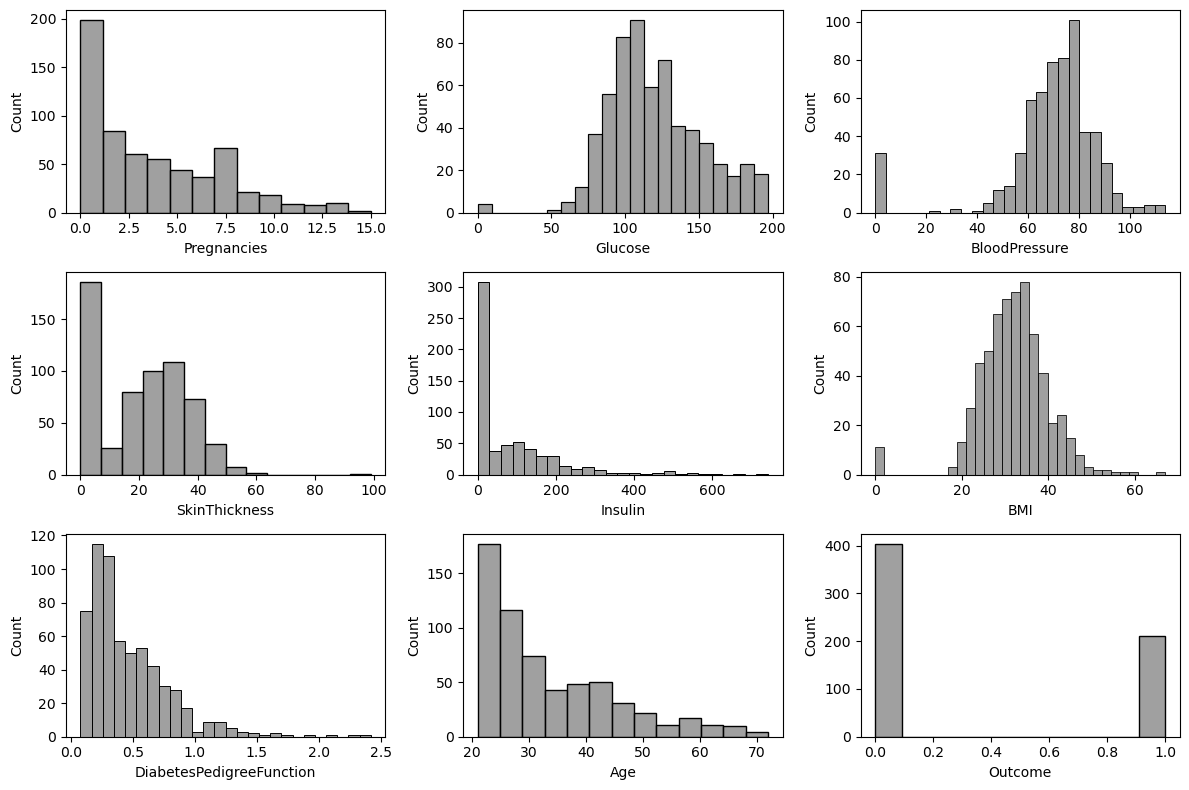

In [4]:
explore_data_columns(df.drop('p_id', axis=1), nrows=3, ncols=3)

We zien hier dat de data vaak niet goed normaal verdeeld zijn. Daarnaast zien we ook dat er veel onrealistische data aanwezig zijn. We gaan de <a id='correlatiematrices'>correlatiematrices</a> berekenen op basis van **Spearman** en **Kendall's Tau**.

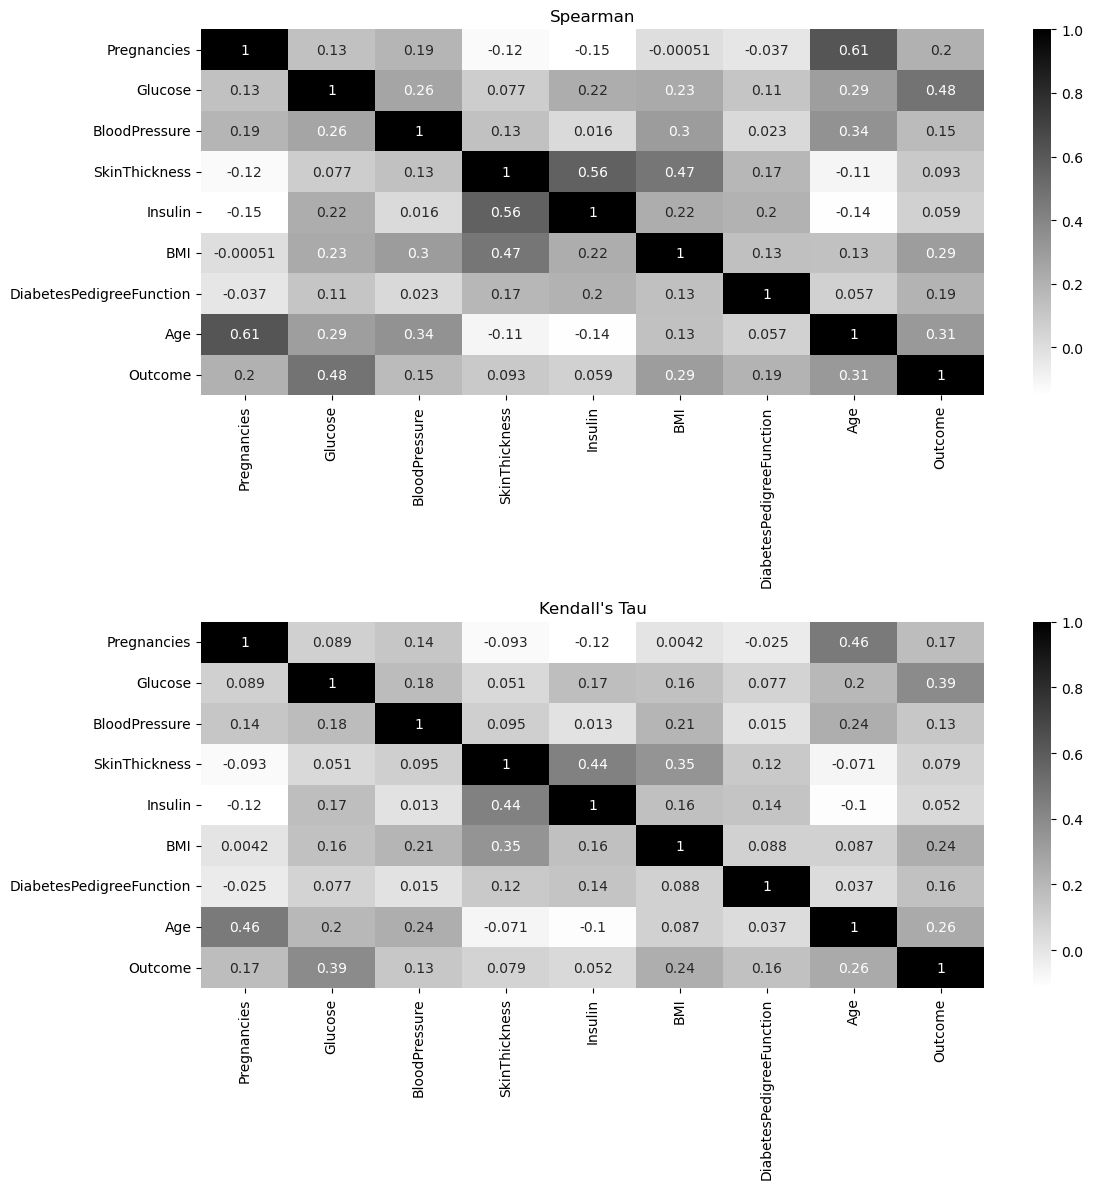

In [5]:
fig, axis = plt.subplots(nrows=2, figsize=(12, 12))

sns.heatmap(df.drop('p_id', axis=1).corr(method='spearman'), annot=True, ax=axis[0], cmap='binary')
sns.heatmap(df.drop('p_id', axis=1).corr(method='kendall'), annot=True, ax=axis[1], cmap='binary')
axis[0].set_title('Spearman')
axis[1].set_title("Kendall's Tau")

plt.tight_layout()

Zoals we zien in de verschillende correlatiematrices, zijn er niet echt hoge correlaties te vinden. Dit is vooral opvallend bij de **Kendall's Tau** correlatiematrix, waarin we geen enkele correlatie zien die een echt sterk verband aangeeft. Dit kan te wijten zijn aan de vele onrealistische waarden in de dataframe. We kunnen deze waarden vervangen of verwijderen en vervolgens de correlatiematrices opnieuw berekenen.

## <font color='grey'> 1.4 Opschonen van de data.

In de <a href="#basisstatistieken">basisstatistieken</a> zagen we al dat er meerdere variabelen zijn met onmogelijke minimumwaarden van 0. Hieronder noem ik een paar van deze variabelen:

- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI

Het is zeer onwaarschijnlijk dat deze waarden daadwerkelijk 0 zijn. De data moet dus vervangen of verwijderd worden. Allereerst gaan we kijken hoe de dataframe eruit zien als we alle rijen weghalen waarbij 0 optreedt. Dit zal de omvang van het dataframe waarschijnlijk flink verminderen. Als er minder data beschikbaar is dan is dat natuurlijk jammer, maar misschien kunnen we nog steeds betrouwbare modellen maken.

In [6]:
print(f'Lengte van de dataframe voordat we hebben opgeschoond: {len(df)}')
        
df_no_zeros = df[(df['Glucose'] != 0 ) & 
                 (df['BloodPressure'] != 0) & 
                 (df['SkinThickness'] != 0) & 
                 (df['Insulin'] != 0) &  
                 (df['BMI'] != 0)].copy()

print(f'Lengte van de dataframe nadat we hebben opgeschoond: {len(df_no_zeros)}')

Lengte van de dataframe voordat we hebben opgeschoond: 614
Lengte van de dataframe nadat we hebben opgeschoond: 312


Hierboven zien we dat het dataframe gehalveerd is. We kiezen nu eerst betrouwbaarheid boven kwantiteit. Later kunnen we heroverwegen of er betere keuzes zijn die zowel betrouwbaar kwantitatief sterk zijn. We gaan nu de correlatiematrices opnieuw weergeven.

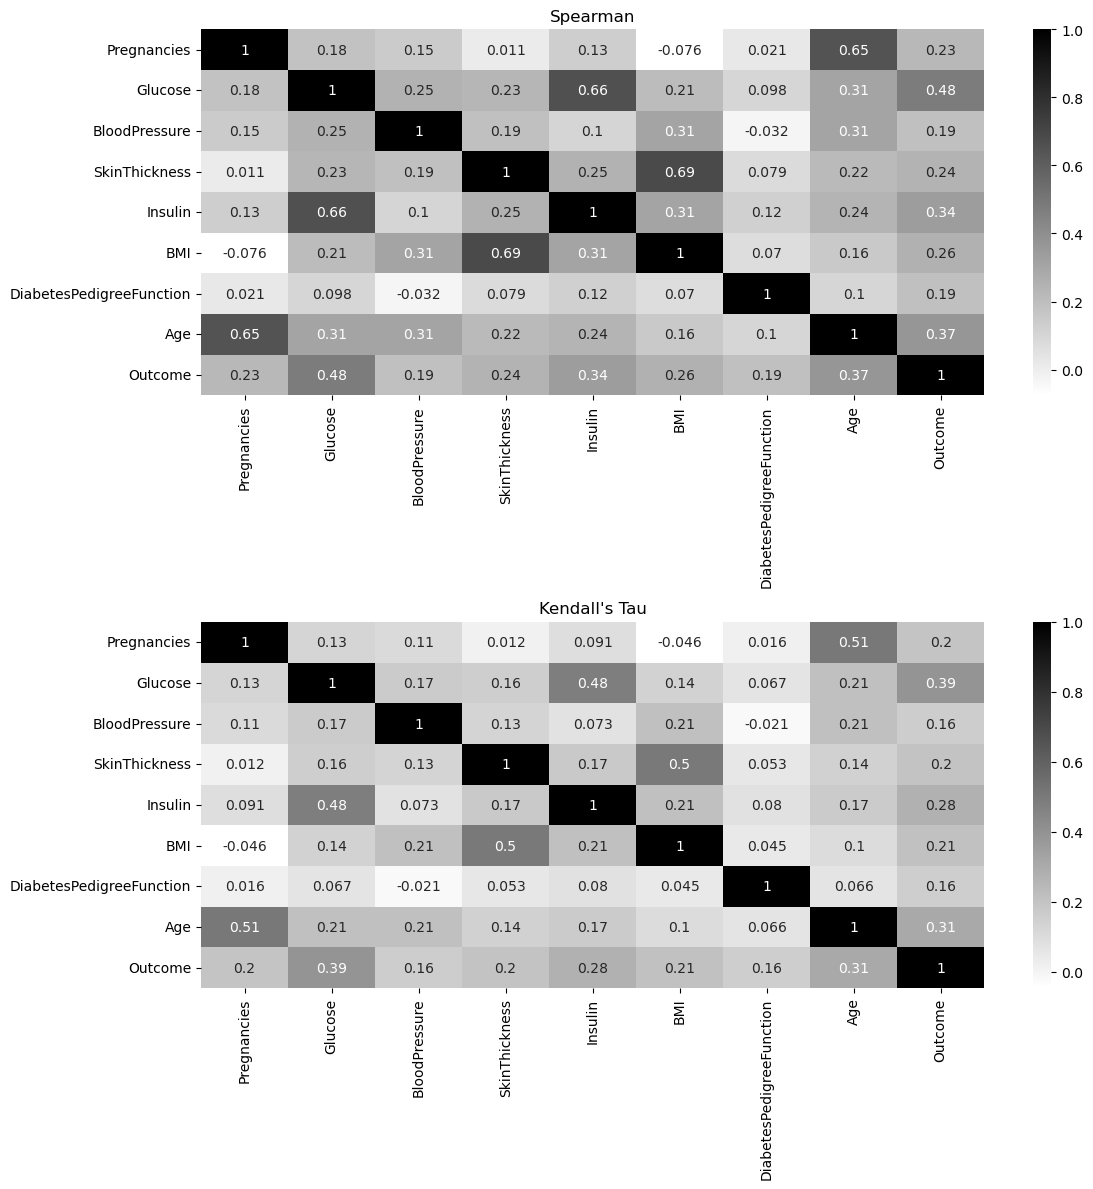

In [7]:
fig, axis = plt.subplots(nrows=2, figsize=(12, 12))

sns.heatmap(df_no_zeros.drop('p_id', axis=1).corr(method='spearman'), annot=True, ax=axis[0], cmap='binary')
sns.heatmap(df_no_zeros.drop('p_id', axis=1).corr(method='kendall'), annot=True, ax=axis[1], cmap='binary')
axis[0].set_title('Spearman')
axis[1].set_title("Kendall's Tau")

plt.tight_layout()

We zien dat de data nu veelbelovender uitziet. Zo zien we bij Spearman dat we maar liefst drie variabelen hebben die een zwakke positieve correlatie hebben met **Outcome**. In de <a href="#correlatiematrices">oorspronkelijke correlatiematrix</a> was dit nog niet het geval. Het lijkt er nu op dat we betere resultaten kunnen verwachten bij het maken van voorspellingsmodellen.

## <font color='grey'> 1.5 Standaardiseren.

We gaan de data nu standaardiseren om betere resultaten te behalen in machine learning. Standaardisatie helpt namelijk om de variabelen op een gemeenschappelijke schaal te brengen, wat de prestaties van veel algoritmen kan verbeteren.

In [8]:
columns_to_standardize = df_no_zeros.drop(['p_id', 'Outcome'], axis=1).columns
scaler = StandardScaler()

df_no_zeros.loc[:, columns_to_standardize] = scaler.fit_transform(df_no_zeros[columns_to_standardize])

display(df_no_zeros)

,p_id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,668,0.883775,-0.797136,-1.031421,0.346574,0.253993,0.094639,-0.247495,1.270319,0
5,204,0.883775,-0.633298,0.072265,0.251388,0.253993,0.610217,-0.554066,2.491077,0
6,97,-0.684699,-1.681863,-1.819768,-1.081213,-0.696556,-1.800460,-0.556958,-0.866008,0
8,568,0.256385,1.037853,0.072265,-0.034169,-0.279649,-0.281594,-0.513575,0.659940,0
12,199,0.256385,0.841247,-0.873751,-0.224541,1.321275,-0.337332,-1.057306,-0.153899,1
...,...,...,...,...,...,...,...,...,...,...
606,258,-0.684699,2.315791,-1.662099,-1.271585,1.796550,-1.034060,0.403246,-0.662548,0
607,282,1.197470,0.349732,1.333621,-1.366771,-0.037842,-0.128314,-0.733381,0.659940,0
608,376,-0.998394,-0.797136,0.860612,-1.366771,-0.629851,-1.131602,-0.626371,-0.866008,0
609,384,-0.684699,0.087590,-0.085404,-0.510098,-0.413059,-1.257013,-0.851961,-0.560818,0


## <font color='grey'> 1.6 Conclusie EDA.

We hebben niet echt goede correlaties kunnen vinden maar het is toch wat verbeterd nadat we alle onrealistische data hebben weg gefilterd. De dataset is wel gehalveerd en dit kan misschien wat slechtere resultaten geven maar ik denk dat we nog genoeg goede kwalitatieve data hebben.

# *Opdracht 2 Evaluatie*

## <font color='grey'> 2.1 Welke vorm van machine learning gebruiken we voor deze opdracht?

We gebruiken supervised learning met classificatiemodellen. De data bevat ook labels die bepalen of iemand diabetes heeft. De labels bestaan uit slechts twee mogelijkheden dus gaan we werken met binaire classificatiemodellen.

## <font color='grey'> 2.2 Welke metrics gaan we gebruiken om de prestatie te onderzoeken?

Voor classificatiemodellen zijn vaak de volgende metrics relevant:
- Accuracy 
- Recall
- F1-score
- Precision

## <font color='grey'> 2.3 Hoe wordt iedere metric berekend?

\begin{align*}
    &\text{Accuracy}& = &\frac{TP + TN}{TP + TN + FP + FN} \\
    &\text{Recall}& = &\frac{TP}{TP + FN} \\
    &\text{F1-score}& = &\frac{2 \cdot TP}{2 \cdot TP + FP + FN} \\
    &\text{Precision}& = &\frac{TP}{TP + FP}
\end{align*}

## <font color='grey'> 2.4 De meest relevante metric voor dit project?

Bij het voorspellen bij diabetes lijkt mij recall de belangrijkste metric. Het verkeerd classificeren kan misschien wel ernstige gevolgen hebben omdat we in een medische context werken. We willen dus ten koste van valse positieven de recall maximaliseren. 

De Kaggle competitie heeft als standaard metric F1-score. Deze metric is ook vrij goed want het geeft een soort van evenwicht tussen precisie en recall. Toch lijkt me recall wel een belangrijkere metric voor dit project.

# *Opdracht 3 Modelleren*

## <font color='grey'> 3.1 Training en testsets.

We maken hier de training en testset. Allereerst gaan we de features en de targets scheiden in X (features) en y (target). We gaan daarna onze train test split doen met een verhou...

In [9]:
X = df_no_zeros.drop(['p_id', 'Outcome'], axis=1).reset_index(drop=True)
y = df_no_zeros['Outcome'].reset_index(drop=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## <font color='grey'> 3.2 Logistische Regressie

#### 3.2.1 Hoe werkt het model?

Logistische regressie is een model dat kansen berekent en deze omzet naar binaire waarden. Als voorbeeld: het model kan een kans 
$p$ van $0.6$ voorspellen. Omdat $p$ in dit geval dichter bij $1$ ligt dan bij $0$, zal het model als uitkomst $1$ geven. De waarden die logistische regressie kan voorspellen zijn discreet en beperkt tot $\hat{y} \in \{0, 1\}$
Dit model maakt dus een discrete voorspelling zoals bijvoorbeeld is het object een kat of geen kat. Voor ons project kan het model bijvoorbeeld voorspellen of iemand wel of geen diabetes heeft.

#### 3.2.2 Hoe werkt de verliesfunctie van het model?

##### Bernouli-verdeling
Logistische regressie voorspelt de waarschijnlijkheid van een bepaalde binaire uitkomst, bijvoorbeeld of een gebeurtenis wel of niet plaatsvindt. Deze voorspelde waarschijnlijkheid, vaak aangeduid als $p$, varieert tussen $0$ en $1$. Om de kwaliteit van deze voorspellingen te evalueren, willen we de voorspelde kansen 
$p$ vergelijken met de daadwerkelijke uitkomsten. De Bernoulli-verdeling gegeven door $P(X = k) = p^k(1 - p)^{1-k}$ waarbij $k \in \{0, 1\}$ is, is bijzonder voor dit doel. Hierbij geeft $P(X = k)$ de waarschijnlijkheid dat de daadwerkelijke uitkomst $k$ is.

##### Meervoudige Bernouli-verdeling
De Bernoulli-verdeling die ik eerder definieerde is alleen geschikt voor een enkele uitkomst. Om een indicatie te krijgen van hoeveel de voorspelde kansen afwijken van de daadwerkelijke uitkomsten nemen we de voorspellingen gegeven door $\mathbf{p} = \{p_1, p_2, \dots, p_n\}$ waarbij $p_i \in [0, 1] \quad \forall i = 1, 2, \dots, n$, en uitkomsten gegeven door $\mathbf{y} = \{y_1, y_2, \dots, y_n\}$ waarbij $y_i \in \{0, 1\} \quad \forall i = 1, 2, \dots, n$.
De gezamenlijke waarschijnlijkheid van deze uitkomsten gegeven de voorspellingen wordt gegeven door: $$\prod_{i=1}^{n} \Biggl[p_i^{y_i} \cdot (1-p_i)^{1-y_i}\Biggr]$$ 

##### Logaritmisch Verlies
Het direct beoordelen van de kwaliteit van ons model aan de hand van het product van waarschijnlijkheden kan uitdagend zijn vooral als 
$n$ groot wordt. Dit komt doordat we werken met producten van waarden die vaak tussen $0$ en $1$ liggen. Als we een groot aantal van deze waarschijnlijkheden met elkaar vermenigvuldigen convergeert de totale waarde naar nul. 
Een oplossing hiervoor is het nemen van de natuurlijke logaritme van deze waarschijnlijkheid. Hierdoor transformeren we het product van waarschijnlijkheden naar een som van log-waarschijnlijkheden. We nemen ook het gemiddelde van deze som. Dit geeft een indicatie van het "gemiddelde log-verlies" per observatie.De gemiddelde log-waarschijnlijkheid wordt gegeven door: $$\frac{1}{n} \sum_{i=1}^{n} \Biggl[ y_i \log(p_i) + (1-y_i) \log(1-p_i) \Biggr]$$

##### De Verliesfunctie
Hoewel de gemiddelde log-waarschijnlijkheid een waardevolle maatstaf is heeft het een kleine tekortkoming voor gebruik in optimalisatie. De waarden zijn namelijk negatief. In de context van modeltraining is het meer gebruikerlijk om met positieve verlieswaarden te werken. Dit komt omdat veel optimalisatie-algoritmen zoals gradient descent zijn ontworpen om een functie te minimaliseren. Een positief verlies dat toeneemt met slechtere voorspellingen past hier beter bij. Daarom vermenigvuldigen we de gemiddelde log-waarschijnlijkheid met $-1$ om een positieve verliesfunctie te krijgen die we willen minimaliseren tijdens het trainingsproces. De verliesfunctie wordt gegeven door: $$-\frac{1}{n} \sum_{i=1}^{n} \Biggl[ y_i \log(p_i) + (1-y_i) \log(1-p_i) \Biggr]$$

#### 3.2.3 Wat is de Gradient van de verliesfunctie? 

##### De verliesfunctie

De verliesfunctie $L$ wordt gedefinieerd als:
$$L(y, \hat{y}) = -y \ln(\hat{y}) - (1-y) \ln(1-\hat{y})$$
waarbij:
- $y$ de werkelijke uitkomst is.
- $\hat{y}$ de voorspelling gegeven door de Sigmoid functie: $\hat{y} = \frac{1}{1 + e^{-z}}$.
- $z$ is de lineaire combinatie van kenmerken $X$ en gewichten $\mathbf{w}$.

Om de gewichten van ons model bij te werken hebben we de gradient van de verliesfunctie ten opzichte van $z$ nodig. De gradient kan worden berekend met behulp van de kettingregel. $$\frac{\partial L}{\partial w_i} = \frac{\partial L}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial z} \frac{\partial z}{\partial w_i}$$

##### Berekening $\frac{\partial L}{\partial \hat{y}}$

\begin{align*}
\frac{\partial L}{\partial \hat{y}} & = \frac{\partial}{\partial \hat{y}} \Biggl(-y \ln(\hat{y}) - (1-y) \ln(1-\hat{y})\Biggr) \\
&= -y\frac{1}{\hat{y}} - (-1)(1 - y)\left(\frac{1}{1 - \hat{y}}\right) \\
&= -\frac{y}{\hat{y}} + \frac{1 - y}{1 - \hat{y}}
\end{align*}

##### Berekening $\frac{\partial \hat{y}}{\partial z}$

\begin{align*}
\frac{\partial \hat{y}}{\partial z} &= \frac{\partial}{\partial z} \Biggl(\frac{1}{1 + e^{-z}}\Biggr) \\
&= \frac{\partial}{\partial z}\Biggl(\left(\frac{1}{1 + e^{-z}}\right)\left(\frac{e^z}{e^z}\right)\Biggr) = \frac{\partial}{\partial z}\Biggl(\frac{e^z}{1 + e^z}\Biggr) \\
&= \frac{(e^z)(1 + e^z) - (e^z)(e^z)}{(1 + e^z)^2} \\
&= \frac{e^z}{(1 + e^z)^2}
\end{align*}

##### Berekening $\frac{\partial z}{\partial w_i}$
De waarde $z$ is een lineaire combinatie van de kenmerken en de gewichten gegeven door $z = w_0 + w_1x_1 + w_2x_2 + \dots + w_nx_n$.
Wanneer we de afgeleide van $z$ nemen met betrekking tot $w_i$ dan vallen alle andere termen die niet de $i$-de term zijn weg omdat die gezien worden als constanten.
Hieruit volgt: $$\frac{\partial z}{\partial w_i} = x_i$$

##### Samenvoegen
Dus de uiteindelijke gradient tot nu toe ziet er zo uit. Zoals je ziet is het misschien slimmer om $\frac{\partial \hat{y}}{\partial z}$ te schrijven in termen van $y$ en $\hat{y}$.
\begin{align*}
\frac{\partial L}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial z} \frac{\partial z}{\partial w_i} &= \left(-\frac{y}{\hat{y}} + \frac{1 - y}{1 - \hat{y}}\right) \left(\frac{e^z}{(1 + e^z)^2}\right) \left(x_i\right) \\
&= \left(-\frac{y}{\hat{y}} + \frac{1 - y}{1 - \hat{y}}\right)\left(\hat{y}(1 - \hat{y})\right)\left(x_i\right) \\
&= \frac{(-y)(\hat{y})(1 - \hat{y})(x_i)}{\hat{y}} + \frac{(1 - y)(\hat{y})(1 - \hat{y})(x_i)}{1 - \hat{y}} \\
&= -y(1 - \hat{y})x_i + (1 - y)\hat{y}x_i \\
&= -yx_i + y\hat{y}x_i + \hat{y}x_i - y\hat{y}x_i \\
&= \hat{y}x_i - yx_i \\
&= (\hat{y} - y)x_i
\end{align*}

##### Conclusie
We hebben de gradient van de log loss verliesfunctie met betrekking tot de gewichten $w_i$ berekend. Namelijk: $\frac{\partial L}{\partial w_i} = (\hat{y} - y)x_i$
Door de gewichten in de richting van de negatieve gradient te verplaatsen minimaliseren we de verliesfunctie en verbeteren we de prestaties van het model. Dit proces wordt herhaald totdat een optimale set van gewichten is bereikt.


#### 3.2.4 Wat voor regularisatie kunnen we toepassen?

##### Wat is regularisatie?
Bij Logistische regressie heb je meerdere technieken om regularisatie te gebruiken. De verschillende regularisatie technieken zijn als volgt l1, l2, en elasticnet. l1 is een korte naam voor de "Lasso" regularisatie en l2 staat eveneens voor "Ridge" regularisatie. elasticnet is een combinatie van l1 en l2. We gebruiken regularisatie vooral om te voorkomen dat ons model "overfit". Dit gebeurt wanneer het model niet goed in staat is om goede resultaten te krijgen als het met ongeziene data werkt. We gaan ze nu allemaal kort toelichten.

##### l1 (Lasso) regularisatie
De regularisatie wordt toegepast door extra termen toe te voegen. Deze penalty is proportioneel met de som van de absolute waarden van de coëfficiënten.
De regularisatieparameter $\lambda$ bepaalt de sterkte van deze penalty. Een grotere waarde van $\lambda$ resulteert in sterkere regularisatie en kan sommige coëfficiënten naar nul duwen. Dit kan erg handig zijn om te kijken welke features meer relevantie hebben.
$$-\frac{1}{n} \sum_{i=1}^{n} \Biggl[ y_i \log(p_i) + (1-y_i) \log(1-p_i) \Biggr] + \lambda\sum_{j=1}^{m}|\theta_j|$$

##### l2 (Ridge) regularisatie
Ook deze regularisatie gebruikt extra termen. Deze penalty is proportioneel met de som van de gekwadrateerde waarden van de coëfficiënten.
De regularisatieparameter $\lambda$ bepaalt de sterkte van deze penalty. Een grotere waarde van $\lambda$ resulteert in een grotere penalty. In tegenstelling to l1 regularisatie zullen de gewichten van de features niet naar 0 geduwd worden. Dit kan dus handig zijn als je zelf vindt dat sommige kenmerken nog relevantie hebben.
$$-\frac{1}{n} \sum_{i=1}^{n} \Biggl[ y_i \log(p_i) + (1-y_i) \log(1-p_i) \Biggr] + \lambda\sum_{j=1}^{m}\theta_j^2$$

##### ElasticNet regularisatie
Bij de ElasticNet regularisatie techniek combineren we l1 en l2 regularisatie. ElasticNet bevat een parameter $\rho$ die de verhouding tussen l1 en l2 weergeeft. Dit stelt ons in staat om de mate van feature selectie aan te passen door het aandeel van l1 te vergroten. Echter om te voorkomen dat l1 te dominant wordt voegen we l2 toe. Met ElasticNet hebben we dus meer controle over de aanpassingen aan de gewichten van het model.
$$-\frac{1}{n} \sum_{i=1}^{n} \Biggl[ y_i \log(p_i) + (1-y_i) \log(1-p_i) \Biggr] + \lambda \left( \rho \sum_{j=1}^{m} |\theta_j| + (1-\rho) \sum_{j=1}^{m} \theta_j^2 \right)$$


#### 3.2.5 Hyperparameter tuning

##### Wat is hyperparameter tuning?
Nu we de werking van logistische regressie begrijpen is het tijd om het toe te passen. De optimale instellingen voor parameters zoals bijvoorbeeld penalty, solver en lambda kunnen variëren afhankelijk van de dataset en het probleem. Om de best mogelijke configuratie te vinden gebruiken we hyperparameter tuning.
Hyperparameter tuning is een manier waarbij we een reeks mogelijke parameterwaarden testen om het model te vinden dat het beste presteert. In de onderstaande code maken we gebruik van een **param_grid** waarin alle combinaties zijn opgenomen.

##### Cross-validation
We gebruiken daarnaast ook cross-validation. Dit helpt bij het voorkomen van overfitting. Het verdeelt de dataset in meerdere "folds" en zorgt ervoor dat het model op verschillende subsets van de data wordt getraind en gevalideerd.

##### F1-score
Als criterium voor modelprestatie hebben we gekozen voor de F1-score. Na het afronden van de grid search, inspecteren we de beste combinatie van parameters die de hoogste F1-score oplevert

In [10]:
param_grids = [{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                'penalty': ['l2'],
                'class_weight': [None, 'balanced']},
                {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                 'solver': ['liblinear', 'saga'],  
                 'penalty': ['l1'],
                 'class_weight': [None, 'balanced']},
                {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                 'penalty': ['elasticnet'],
                 'solver': ['saga'],  
                 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
                 'class_weight': [None, 'balanced']},
                {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                 'penalty': ['none'],  
                 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
                 'class_weight': [None, 'balanced']}]

f1_scorer = make_scorer(f1_score)
grid_search = GridSearchCV(LogisticRegression(),
                           param_grids, 
                           cv=5, 
                           scoring=f1_scorer, 
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
print(f'Beste parameters: {grid_search.best_params_}\nF1-score: {grid_search.best_score_}')

Beste parameters: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'saga'}
F1-score: 0.701802002224694


#### 3.2.6 Resultaten

              precision    recall  f1-score   support

           0       0.79      0.78      0.78        58
           1       0.65      0.67      0.66        36

    accuracy                           0.73        94
   macro avg       0.72      0.72      0.72        94
weighted avg       0.74      0.73      0.73        94



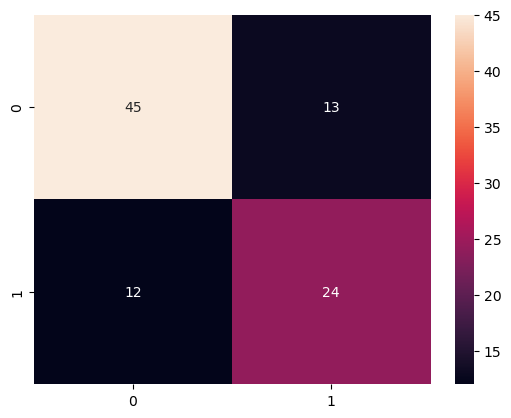

In [11]:
logistic_regression = grid_search.best_estimator_
y_logistic_predictions = logistic_regression.predict(X_test)
estimators = {}
estimators['logistic_regression'] = [logistic_regression, y_logistic_predictions]

sns.heatmap(confusion_matrix(y_test, y_logistic_predictions), annot=True)
print(classification_report(y_test, y_logistic_predictions))

## <font color='grey'> 3.3 Decision Tree

#### 3.3.1 Hoe werkt het model?

Net zoals logistische regressie wordt een decision tree gebruikt voor classificatie (het kan ook gebruikt worden in regressie, maar we kijken nu naar classificatie). De decision tree classificeert door beslissingen te nemen op basis van features. Tijdens het trainingsproces wordt voor elk feature geëvalueerd hoe goed het de data kan splitsen. Het maakt hierbij gebruik van criteria zoals "Gini impurity" of "entropy". De feature dat de beste splitsing oplevert wordt geselecteerd voor de splitsing. Dit wordt steeds herhaald totdat een verdere splitsing niet nodig is. 

#### 3.3.2 Hoe werken de Gini impurity en entropy technieken?

##### Maken van de beslissingsboom
Bij het bouwen van een beslissingsboom worden alle beschikbare features geëvalueerd. Voor elke feature wordt bij elke beslissingsnode gezocht naar de optimale drempelwaarde die de dataset het meest zuiver splitst. Dit houdt in dat elke unieke waarde van de feature als potentiële drempelwaarde wordt overwogen. De mate van zuiverheid van een splitsing wordt gemeten met behulp van criteria zoals "Gini impurity" of "entropy". Na het grondig evalueren van een feature wordt de volgende feature onderzocht. Aan het einde van dit proces wordt duidelijk welke feature in combinatie met welke drempelwaarde de meest zuivere splitsing van de data oplevert.

##### Gini impurity
Laat $S$ een set zijn die bestaat uit de verschillende klassen (in ons geval $S = \{0, 1\})$. Voor elke klasse $i$ in $S$, laat $p_i$ (waarbij $p_i \in [0, 1]$) de waarschijnlijkheid zijn dat een willekeurig gekozen observatie uit de dataset $i$ als klasse heeft. De Gini impurity $G$ van $S$ is dan gegeven door:
$$G(p) = 1 - \sum_{i \in S} p_i^2$$
De waarschijnlijkheid $p_i$ wordt berekend als: $p_i = \frac{\text{Aantal rijen met de klasse $i$}}{\text{Totaal aantal rijen}}$ <br>
In ons geval waar $S = \{0, 1\}$ ligt het bereik van $G$ tussen $0$ en $0.5$. Hierbij vertegenwoordigd $0.5$ de maximale onzuiverheid (dit betekent dat de observaties gelijk verdeeld zijn). We zijn dus steeds op zoek naar een feature waarbij de $G$ zo dicht mogelijk bij $0$ ligt. Als we dit hebben gevonden weten we dat dit de beste splitsing is. 

##### Entropy
Laat $S$ een set zijn die bestaat uit de verschillende klassen. In ons specifieke geval is $S = \{0, 1\}$. Voor elke klasse $i$ in $S$, laat $p_i$ (waarbij $p_i \in [0, 1]$) de waarschijnlijkheid zijn dat een willekeurig gekozen observatie uit de dataset $i$ als klasse heeft. De entropy $E$ van $S$ is dan gegeven door:
$$E(p) = - \sum_{i \in S} p_i \log_2(p_i)$$
De waarschijnlijkheid $p_i$ wordt berekend als: $p_i = \frac{\text{Aantal rijen met de klasse $i$}}{\text{Totaal aantal rijen}}$ <br>
In ons geval waar $S = \{0, 1\}$ ligt het bereik van $E$ tussen $0$ en $1$. Hierbij vertegenwoordigd $1$ de maximale onzuiverheid (dit betekent dat de observaties gelijk verdeeld zijn). We zijn dus steeds op zoek naar een feature waarbij de $E$ zo dicht mogelijk bij $0$ ligt. Als we dit hebben gevonden weten we dat dit de beste splitsing is. 

##### Welke zuiverheidscriteria is beter?
Beide criteria hebben hun eigen nuances. "Entropy" heeft een breder bereik en kan daarom wat beter gebruikt worden in situaties waarbij de klassenverdeling bijna gelijk zijn. Echter maakt de berekening van "Entropy" gebruik van een logaritische functie gebruikt. Deze functie zorgt ervoor dat het wat complexer is en dus tijdsintensiever is dan "Gini". "Gini" is wat eenvoudiger en ook dus ook sneller dan "Entropy". Bij het bouwen van een beslissingsboom bereken je "Gini" of "Entropy" heel erg vaak. Dit komt omdat we voor iedere drempelwaarde de "Gini" of "Entropy" berekenen. Over de gehele dataset kan de berekeningstijd dus oplopen als je "Entropy" gebruikt. 

#### 3.3.3 Hyperparameter tuning

In [12]:
param_grid = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'ccp_alpha': [0.0, 0.001, 0.01, 0.02, 0.03, 0.04, 0.05],
              'max_depth': [None, 3, 5, 7, 10, 15, 20],
              'min_samples_split': [2, 3, 4, 5, 10],
              'min_samples_leaf': [1, 2, 3, 4, 5],
              'max_features': [None, 'auto', 'sqrt', 'log2'],
              'max_leaf_nodes': [None, 10, 20, 30, 40, 50],
              'min_impurity_decrease': [0.0, 0.001, 0.01, 0.1],
              'class_weight': [None, 'balanced']}

f1_scorer = make_scorer(f1_score)
grid_search = GridSearchCV(DecisionTreeClassifier(),
                           param_grid,
                           cv=5,
                           scoring=f1_scorer,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
print(f'Beste parameters: {grid_search.best_params_}\nF1-score: {grid_search.best_score_}')

Beste parameters: {'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': 10, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 4, 'splitter': 'random'}
F1-score: 0.7369196305486628


#### 3.3.4 Wat is Pruning?

Pruning is een techniek die wordt gebruikt om te voorkomen dat een beslissingsboom overfit raakt. Het doel van pruning is om de tree minder complex te maken en betere voorspellingen te maken bij ongeziene data. Het hoeft alleen niet altijd zo te zijn dat bij pruning het model beter gaat presteren op ongeziene data. Het kan namelijk ook dat we de tree teveel versimpelen. De tree zal dan underfit zijn. Dit betekent dat het op de training en testdata niet goed presteert. We gebruiken bij onze **grid_search** meerdere parameters waarbij een vorm van pruning wordt toegepast.

##### ccp_alpha (Cost complexity pruning)
Bij cost complexity pruning wordt de beslissingsboom eerst volledig gegroeid. Vervolgens wordt deze boom gesnoeid tot verschillende subtrees op basis van diverse ccp_alpha waarden. De optimale subtree wordt geselecteerd op basis van de gekozen ccp_alpha, waarbij een balans wordt gezocht tussen de complexiteit van de boom en de prestaties ervan.

##### max_depth 
Bij het instellen van een maximale diepte weerhouden we de tree om al te groot te worden. Dit zorgt ervoor dat de tree minder nauwkeurige uitkomsten heeft op de trainingsdata maar kan misschien wel beter functioneren op de testdata.

##### max_samples_split en min_samples_leaf
max_samples_split en min_samples_leaf zijn parameters die de groei van een beslissingsboom beperken. max_samples_split stelt een minimum aan het aantal samples dat nodig is om een node te splitsen terwijl min_samples_leaf het minimumaantal samples vaststeld dat een leafnode moet bevatten. Door deze beperkingen wordt overfitting verminderd en wordt voorkomen dat de tree te complex of te specifiek wordt voor de trainingsdata.

##### max_leaf_nodes
Door het maximale aantal leafnodes te beperken wordt de grootte en de complexiteit van de tree beperkt.

##### min_impurity_decrease
Een node wordt alleen gesplitst als de splitsing een bepaalde afname van de onzuiverheid veroorzaakt.

#### 3.3.5 Resultaten

              precision    recall  f1-score   support

           0       0.75      0.72      0.74        58
           1       0.58      0.61      0.59        36

    accuracy                           0.68        94
   macro avg       0.66      0.67      0.67        94
weighted avg       0.68      0.68      0.68        94



<Axes: >

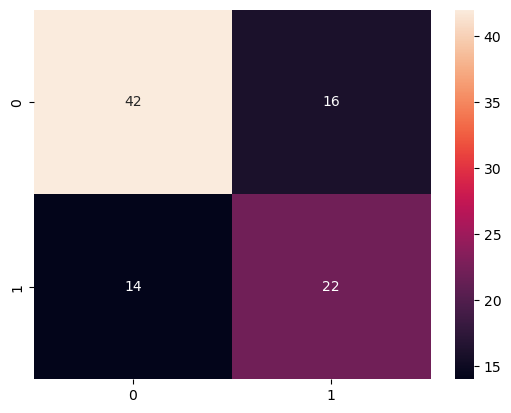

In [13]:
decision_tree = grid_search.best_estimator_
y_decision_tree_predictions = decision_tree.predict(X_test)
estimators['decision_tree'] = [decision_tree, y_decision_tree_predictions]

print(classification_report(y_test, y_decision_tree_predictions))
sns.heatmap(confusion_matrix(y_test, y_decision_tree_predictions), annot=True)

## <font color='grey'> 3.4 Random forest

#### 3.4.1 Hoe werkt het ensemble?

Random forest is geen model maar het is een ensemble. Dat betekent dat het meerdere modellen samenbrengt om gezamenlijk tot een resultaat te komen. Random forest werkt door per tree een random subset van de observaties te selecteren. Deze subset wordt vervolgens op een random subset van de features getraind. Dit betekent dus dat er overlapping is tussen meerdere trees, en het zorgt ervoor dat een dominante feature niet overheerst. Nadat de trees zijn getraind worden alle trees geaggregeerd. Bij regressie problemen wordt dan vaak het gemiddelde gebruikt en voor classificatie problemen wordt vaak een meerderheidsstemming gehouden (de klasse die het meest voorspeld wordt door alle trees).

#### 3.4.2 Hoe verhoudt dit model zich t.o.v. andere tree based models?

Over het algemeen zijn random forests goed in het voorkomen van overfitting. Dit komt omdat ze het gemiddelde of meerderheidsstemming nemen van meerdere trees die allemaal net iets anders zijn getraind. Decision trees zijn vaak wat minder nauwkeurig omdat het een grotere kans heeft op overfitting. Gradient boosting heeft dit ook wel maar vergt meer specifieke hyperparameter tuning.

#### 3.4.3 Hyperparameter tuning

In [14]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators': [50, 100, 150],
              'criterion': ['gini', 'entropy'],
              'max_depth': [None, 5, 10, 15],
              'min_samples_split': [2, 4, 6],
              'min_samples_leaf': [1, 2, 3],
              'max_features': ['sqrt', 'log2', None],
              'bootstrap': [True, False],
              'class_weight': [None, 'balanced'],
              'ccp_alpha': [0.0, 0.01, 0.02],
              'max_samples': [None, 0.5, 0.7]}

f1_scorer = make_scorer(f1_score)
grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid,
                           cv=5,
                           scoring=f1_scorer,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
print(f'Beste parameters: {grid_search.best_params_}\nF1-score: {grid_search.best_score_}')

C:\Users\jaspe\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
38880 fits failed out of a total of 116640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
38880 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jaspe\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jaspe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 397, in fit
    raise ValueError(
ValueError: `max_sample` cannot be set if `bootstrap=False`. Either switch to `bootstrap=True` or set `max_sample=None`.

  warnings.warn(some_fits_failed_message, FitFailedWarning

Beste parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 15, 'max_features': 'sqrt', 'max_samples': 0.5, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 50}
F1-score: 0.7234528911948267


C:\Users\jaspe\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [0.54632033 0.55832033 0.57257919 ...        nan        nan        nan]
  warnings.warn(


#### 3.4.4 Resultaten

              precision    recall  f1-score   support

           0       0.75      0.81      0.78        58
           1       0.65      0.56      0.60        36

    accuracy                           0.71        94
   macro avg       0.70      0.68      0.69        94
weighted avg       0.71      0.71      0.71        94



<Axes: >

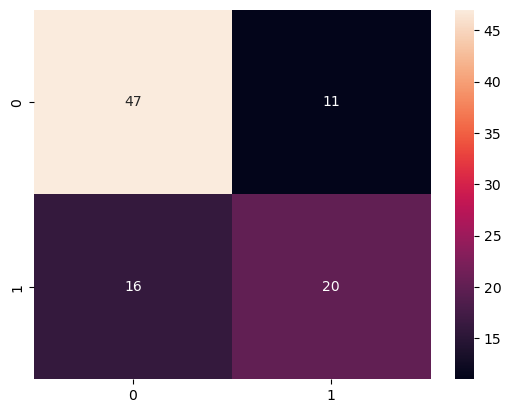

In [15]:
random_forest = grid_search.best_estimator_
y_random_forest_predictions = random_forest.predict(X_test)
estimators['random_forest'] = [random_forest, y_random_forest_predictions]

print(classification_report(y_test, y_random_forest_predictions))
sns.heatmap(confusion_matrix(y_test, y_random_forest_predictions), annot=True)

## <font color='grey'> 3.5 Gradient boosting 

#### 3.5.1 Hoe werkt het ensemble?

Gradient boosting werkt door een reeks van correcties. Iedere term in deze reeks is een model. Deze modellen zijn steeds correcties van de voorgaande termen. Uiteindelijk werkt dit omdat de modellen zijn getraind om de fouten van de voorgaande termen te voorspellen. Als we alle fouten hebben van een model weten we dus in welke richting we moeten gaan om de fout te minimaliseren. Dit zorgt er dus voor dat we uiteindelijk een model hebben wat een goede voorspelling geeft. Ik zal het nog wat duidelijker illustreren met dit voorbeeld.

We gebruiken voor dit voorbeeld een loss function met mean squared error dus is het niet helemaal hetzelfde als met decision trees. Er wordt dan namelijk een andere loss function gebruikt zoals bijvoorbeeld de log loss. Dit voorbeeld is vooral om te laten zien hoe het ensemble werkt.

##### Voorbeeld met een regressie probleem
Gegeven is $Y = \{4, 6, 7, 9, 10, 12\}$.
We beginnen met een domme voorspelling zodat we een start punt hebben. Meestal wordt gekozen voor het gemiddelde van $Y$ hieruit volgt $\hat{Y_0} = \{8, 8, 8, 8, 8, 8\}$.
We berekenen het eerste residu als volgt $R_0 = Y - \hat{Y_0} = \{-4, -2, -1, 1, 2, 4\}$.

Laten we nu de eerste paar correcties uitrekenen. $\lambda$ is hier de learning rate/stapgrootte richting het negatieve gradient. We kiezen voor $\lambda = 0.1$

\begin{align*}
    \hat{Y_1} &= \hat{Y_0} + \lambda R_0 \\
    &= \{7.6, 7.8, 7.9, 8.1, 8.2, 8.4\} \\\\
    \hat{Y_2} &= \hat{Y_1} + \lambda R_1 \text{ met } R_1 = Y - \hat{Y_1} = \{-3.6, -1.8, -0.9, 0.9, 1.8, 3.6\} \\
    &= \{7.24, 7.62, 7.81, 8.19, 8.38, 8.76\}
\end{align*}

Zoals je ziet naderen we per model een steeds kleinere fout en dus een betere voorspelling. 

##### Hoe worden bomen gevormd in dit ensemble?
Bomen kun je ook gebruiken in het ensemble. Het is net als het voorbeeld hierboven alleen heb je een andere loss function zoals bijvoorbeeld de log loss. Het is wel verstandig om ervoor te zorgen dat de bomen die je initialiseerd zwak zijn. Dit kun je doen door de diepte, bladwaarde van een boom te reguleren. 

#### 3.5.2 Hyperparameter tuning

In [16]:
param_grid = {'n_estimators': [50, 100, 150],
              'learning_rate': [0.01, 0.05, 0.1, 0.5],
              'max_depth': [3, 5, 7, 9],
              'min_samples_split': [2, 4, 6],
              'min_samples_leaf': [1, 2, 3],
              'max_features': ['sqrt', 'log2', None],
              'subsample': [0.8, 0.9, 1.0],
              'ccp_alpha': [0.0, 0.01, 0.02]}

f1_scorer = make_scorer(f1_score)
grid_search = GridSearchCV(GradientBoostingClassifier(),
                           param_grid,
                           cv=5,
                           scoring=f1_scorer,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
print(f'Beste parameters: {grid_search.best_params_}\nF1-score: {grid_search.best_score_}')

Beste parameters: {'ccp_alpha': 0.0, 'learning_rate': 0.5, 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100, 'subsample': 1.0}
F1-score: 0.6677671957671958


#### 3.5.3 Resultaten

              precision    recall  f1-score   support

           0       0.73      0.78      0.75        58
           1       0.59      0.53      0.56        36

    accuracy                           0.68        94
   macro avg       0.66      0.65      0.65        94
weighted avg       0.68      0.68      0.68        94



<Axes: >

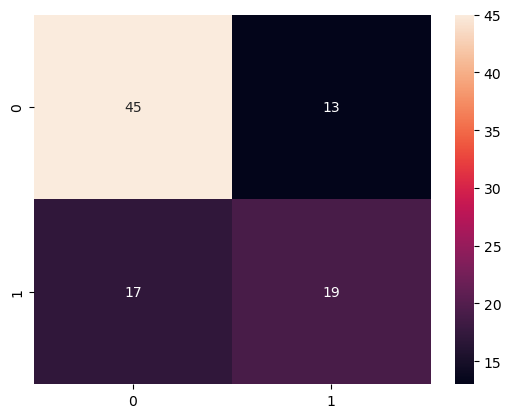

In [17]:
gradient_boosting = grid_search.best_estimator_
y_gradient_boosting_predictions = gradient_boosting.predict(X_test)
estimators['gradient_boosting'] = [gradient_boosting, y_gradient_boosting_predictions]

print(classification_report(y_test, y_gradient_boosting_predictions))
sns.heatmap(confusion_matrix(y_test, y_gradient_boosting_predictions), annot=True)

## <font color='grey'> 3.6 Ada boosting 

#### 3.6.1 Hoe werkt dit ensemble

Ada boosting werkt ook door een reeks modellen te trainen. Ieder model wordt gebouwd met als doel dat het de grootste fout van het vorige model moet corrigeren. Observaties die verkeerd zijn geclassificeerd krijgen meer gewicht. Hierdoor krijgt ieder opeenvolgend model een focus om de grootste fouten te corrigeren. 
Elk model in de reeks brengt zijn eigen correcties aan en deze worden zorgvuldig gewogen om de fouten te minimaliseren. De voorspelling wordt door een gewogen meerderheidsstem van alle modellen in het ensemble gekozen. Ondanks dat elk model zwak kan zijn en slechts een kleine verbetering biedt boven willekeurig gokken krijg je uiteindelijk een goed resultaat. Dit komt omdat de modellen die beter presteren een zwaarder gewicht krijgen bij de meerderheidsstem. 
Ada boosting wordt vooral gebruikt bij classificatie en dus werken decision trees goed. Decision trees worden gebruikt op een manier waardoor het zwakke modellen zijn. Dit doet het door "stumps" te maken. (dit betekent dat de diepte van de boom slechts 1 is).

#### 3.6.2 Hyperparameter tuning

In [18]:
param_grid = {'n_estimators': [50, 100, 150],
              'learning_rate': [0.01, 0.05, 0.1, 0.5],
              'estimator__max_depth': [1, 3, 5],
              'estimator__min_samples_split': [2, 4, 6],
              'estimator__min_samples_leaf': [1, 2, 3],
              'estimator__max_features': ['sqrt', 'log2', None]}

f1_scorer = make_scorer(f1_score)
grid_search = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier()),
                           param_grid,
                           cv=5,
                           scoring=f1_scorer,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

print(f'Beste parameters: {grid_search.best_params_}\nF1-score: {grid_search.best_score_}')

Beste parameters: {'estimator__max_depth': 5, 'estimator__max_features': 'log2', 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 6, 'learning_rate': 0.05, 'n_estimators': 150}
F1-score: 0.6906003626003626


#### 3.6.3 Resultaten

              precision    recall  f1-score   support

           0       0.72      0.86      0.79        58
           1       0.68      0.47      0.56        36

    accuracy                           0.71        94
   macro avg       0.70      0.67      0.67        94
weighted avg       0.71      0.71      0.70        94



<Axes: >

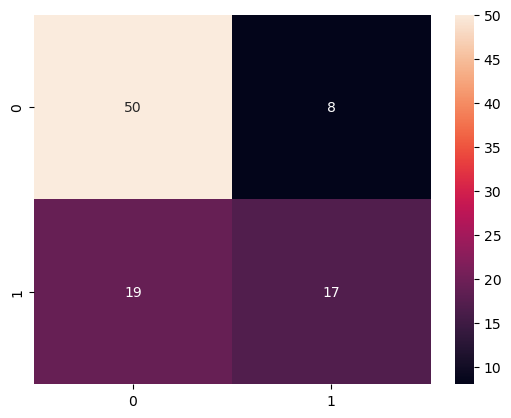

In [19]:
ada_boosting = grid_search.best_estimator_
y_ada_boosting_predictions = ada_boosting.predict(X_test)
estimators['ada_boosting'] = [ada_boosting, y_ada_boosting_predictions]

print(classification_report(y_test, y_ada_boosting_predictions))
sns.heatmap(confusion_matrix(y_test, y_ada_boosting_predictions), annot=True)

## <font color='grey'> 3.7 SVM

#### 3.7.1 Hoe werkt het model?

In classificatieproblemen wordt vaak een duidelijke grens gebruikt om klassen te scheiden. SVM gebruiken dit ook d.m.v een "straat" te maken. Deze straat wordt begrensd door wat we "support vectors" noemen. Het doel van het model is om de breedte van deze straat te maximaliseren. Door dit te doen krijgt het model twee duidelijke scheidingslijnen die de klassen zo goed mogelijk proberen te scheiden. Hoe dat werkt gaan we wiskundig verder uitleggen. 

#### 3.7.2 Het optimalisatieprobleem

##### Hyperplane
Om een goede scheiding te maken tussen twee verschillende klassen hebben we een scheidingslijn of scheidingsvlak nodig. Deze moet afhankelijk zijn van de dimensie van de ruimte. In een tweedimensionale ruimte $\mathbb{R}^2$ kunnen we een lijn gebruiken als scheiding. In een driedimensionale ruimte hebben we een tweedimensionaal vlak nodig. Over het algemeen hebben we in een ruimte van $\mathbb{R}^d$ met $d \in \mathbb{N}$ een vlak nodig dat ligt in $\mathbb{R}^{d-1}$. We noemen dit vlak een "hyperplane". Deze hyperplane kunnen we wiskundig formuleren als $w \cdot x + b = 0 $ hierbij is $w$ een vector van alle gewichten, $x$ een vector van een observatie, en $b$ de bias. 

##### Breedte van de straat
We definiëren de positieve rand van de straat als volgt $w \cdot x_+ + b \geq 1$ hierbij is $x_+$ een positieve observatie. De negatieve rand van de straat definiëren we als $w \cdot x_- + b \leq -1$. Het is alleen erg vervelend om steeds met twee verschillende condities te werken voor eigenlijk hetzelfde type probleem. We kunnen een nieuw element definiëren om dit te reduceren tot slechts één conditie. Neem $y_i \in {-1, 1}$ dit zijn dus de labels die we hebben en dit maakt SVM een supervised learning techniek. De nieuwe conditie is als volgt: $$y_i(w \cdot x_i + b) \geq 1$$
Voor het bepalen hoe breed de straat is kunnen we twee vectoren maken. Neem een vector $x_-$ en een vector $x_+$. Deze vectoren liggen precies op de rand van de straat. Dit noemen we ook wel steunvectoren. De afstand tussen $x_+$ en $x_-$ is dus een willekeurige straat afstand. We willen de loodrechte afstand van de straat hebben. Aangezien we weten dat $w$ altijd loodrecht ligt op een hyperplane kunnen we de volgende formule opstellen: $$\text{Breedte} = (x_+ - x_-) \cdot \frac{w}{||w||}$$

We kunnen dit nog verder versimpelen door het slechts in termen van $w$ te schrijven. We kunnen dit doen door de hyperplanes van de positieve en negatieve klasse van elkaar af te trekken en te vervangen in de breedte formule. 

\begin{align*}
    w \cdot x_+ + b &= 1 \\
    w \cdot x_- + b &= -1 \\\\
    (w \cdot x_+ + b) - (w \cdot x_- + b) &= 2 \\
    w \cdot x_+ - w \cdot x_- &= 2 \\
    w \cdot (x_+ - x_-) &= 2
\end{align*}

We kunnen hiermee de breedte herschrijven als: $$\text{Breedte} = \frac{2}{||w||}$$

##### Lagrange
Nu we een manier hebben gevonden om de breedte van de straat te definiëren willen we deze breedte maximaliseren. We willen het echter maximaliseren op de conditie van $y_i(w \cdot x_i + b) \geq 1$. Dit kunnen we doen met behulp van de lagrange methode. De lagrange methode kan een bepaalde functie laten optimaliseren onder bepaalde berperkingen. Voordat we de lagrange methode gebruiken gaan we eerst de conditie van breedte opstellen. We herschrijven $\text{Max} \frac{2}{||w||}$ naar $\text{Min} \frac{1}{2}||w||^2$. We herschrijven dit uit wiskundige gemakzucht. Het is bijvoorbeeld een term die makkelijker te differentiëren is. Nu stellen we de lagrange op:

1. Stel de lagrange op: $$L(w, b, \alpha) = \frac{1}{2} ||w||^2 - \sum_{i=1}^{n} \alpha_i \left[ y_i (w \cdot x_i + b) - 1 \right]$$
2. Bereken de gradienten: $$\frac{\partial L}{\partial w} = w - \sum_{i=1}^{n} \alpha_i y_i x_i = 0$$
$$\frac{\partial L}{\partial b} = - \sum_{i=1}^{n} \alpha_i y_i = 0$$
3. Herschrijf $w$: $$w = \sum_{i=1}^{n} \alpha_i y_i x_i$$
4. Herschrijf de lagrange met de gradienten: 

\begin{align*}
    L(\alpha) &= \frac{1}{2}(\sum_{i=1}^n a_iy_ix_i)(\sum_{j=1}^n a_jy_ix_j) - \sum_{i=1}^n a_iy_ix_i(\sum_{j=1}^n a_jy_jx_j) - \sum_{i=1}^n a_iy_ib + \sum_{i=1} a_i \\
              &= \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_i \alpha_j y_i y_j (x_i \cdot x_j) - \sum_{i=1}^{n} \alpha_i y_i (\sum_{j=1}^{n} \alpha_j y_j x_j) \cdot x_i + \sum_{i=1} a_i  \\
              &= \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_i \alpha_j y_i y_j (x_i \cdot x_j) - \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_i \alpha_j y_i y_j (x_i \cdot x_j) + \sum_{i=1} a_i  \\
              &= \sum_{i=1}^{n} \alpha_i - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_i \alpha_j y_i y_j (x_i \cdot x_j)
\end{align*}

Met deze formule kunnen we het optimalisatieprobleem opstellen namelijk: 

\begin{align*}
    \text{Max} &L(\alpha) = \sum_{i=1}^{n} \alpha_i - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_i \alpha_j y_i y_j (x_i \cdot x_j) \\
    \text{Onder de condities: } &a_i \geq 0, i \in \mathbb{N} \text{ en } \sum_{i=1}^n a_iy_i = 0
\end{align*}

De voorwaarde $\sum_{i=1}^n a_iy_i = 0$ komt voort door het differentiëren van $L(w, b, \alpha)$ naar $b$. Het zorgt ervoor dat de oplossing voldoet aan de beperkingen van het probleem wat we hebben opgesteld bij de lagrange.

##### Samenvatting
We hebben dus als eerst uitgelegd wat een hyperplane is. Dit zorgt er dus voor dat we een scheidingsvlak kunnen maken tussen twee klassen. Vervolgens hebben we de breedte van de straat uitgelegd en een manier gevonden hoe we deze kunnen maximaliseren. We hebben de lagrange methode gebruikt om het optimalisatieprobleem op te stellen onder beperkingen die zijn opgelegd aan de observaties ($x_+, x_-$). 

#### 3.7.3 Kernel trick

Hoewel de bovenstaande formulering effectief is voor data met lineaire verbanden is het niet effectief voor kwadratische verbanden. Als dit probleem zich voordoet wordt er vaak gebruik gemaakt van de kernel trick. De kernel trick transformeert de $x_i \cdot x_j$ naar een hogere dimensionale ruimte. Het optimalisatieprobleem wordt dan vaak herschreven als: 
$$\text{Max} L(\alpha) = \sum_{i=1}^{n} \alpha_i - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_i \alpha_j y_i y_j K(x_i \cdot x_j)$$
Als we voor deze functie de optimale waarden voor $a_i$ vinden kunnen we een beslissingsfunctie definiëren. Neem een nieuwe observatie $x$, we maken een beslissingsformule. Dit is gebasseerd op de definitie van een hyperplane $w \cdot x + b = 0$. De beslissingsformule is als volgt: $\text{sign}(w \cdot x + b)$ hierbij wordt de "sign" functie gebruikt om een punt wat niet $1$ of $-1$ is te classificeren als $1$ of $-1$ waarbij het punt het meest van in de buurt ligt. We vervangen de $w$ met $w = \sum_{i=1}^n a_iy_ix$. Hieruit volgt: $$\text{sign} \left(\sum_{i=1}^n a_iy_i(x_i \cdot x) + b\right)$$. In het geval van het gebruik met een kernel trick krijgen we: $$\text{sign} \left(\sum_{i=1}^n a_iy_iK(x_i \cdot x) + b\right)$$

In [37]:
small_model = SVC(kernel='linear')
small_model.fit(X[:10], y[:10])

print(f'De gewichtsvector w: {small_model.coef_}, bias b: {small_model.intercept_}, en de lagrange alpha: {small_model.dual_coef_}')

De gewichtsvector w: [[-0.37294169  0.32008708 -0.44821772  0.16456577  0.79351002  0.44408897
   0.05410842 -0.55814188]], bias b: [-0.45570768], en de lagrange alpha: [[-0.12810579 -0.07772517 -0.4863354  -0.11328221  0.40270443  0.21858075
   0.18416339]]


#### 3.7.4 Loss function en regularisatie

##### Hinge Loss
De loss function die vaak gebruikt wordt is de "Hinge Loss". Deze is gedefinieerd als: $$\text{Hinge Loss} = \text{max}(0, 1 - y(w \cdot x_i + b))$$ 
Deze verliesfunctie meet de mate waarmee een observatie verkeerd is geclassificeerd. Als $y_i(w \cdot x_i + b) \geq 1$, dan is de observatie correct geclassificeerd en is de loss 0. Als het kleiner dan $1$ dan is de observatie verkeerd geclassificeerd en is de loss $1 - y_i(w \cdot x_i + b)$. 

##### Regularisatie
We kunnen zowel l1 als l2 regularisatie gebruiken. De loss functions zijn dan als volgt:
$$\text{L1} = \frac{1}{n} \sum_{i=1}^n \text{max}(0, 1 - y(w \cdot x_i + b)) + \lambda \sum_{j=1}^m|w_j|$$
$$\text{L2} = \frac{1}{n} \sum_{i=1}^n \text{max}(0, 1 - y(w \cdot x_i + b)) + \lambda ||w||^2$$

Zoals we al weten leidt L1 regularisatie tot een model met minder features omdat het het veel gewichtscoëfficiënten naar nul duwt. Dit kan handig zijn voor feature selection. l2 regularisatie is vooral handig als je dat niet wil en alle features wil behouden maar toch overfitting wil minimaliseren.

#### 3.7.5 Hyperparameter Tuning

In [20]:
param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
              'gamma': ['scale', 'auto'],
              'degree': [2, 3, 4, 5]}

f1_scorer = make_scorer(f1_score)
grid_search = GridSearchCV(SVC(),
                           param_grid,
                           cv=5,
                           scoring=f1_scorer,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

print(f'Beste parameters: {grid_search.best_params_}\nF1-score: {grid_search.best_score_}')

Beste parameters: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'sigmoid'}
F1-score: 0.6488921980755011


#### 3.7.6 Resultaten

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        58
           1       0.62      0.50      0.55        36

    accuracy                           0.69        94
   macro avg       0.67      0.66      0.66        94
weighted avg       0.68      0.69      0.68        94



<Axes: >

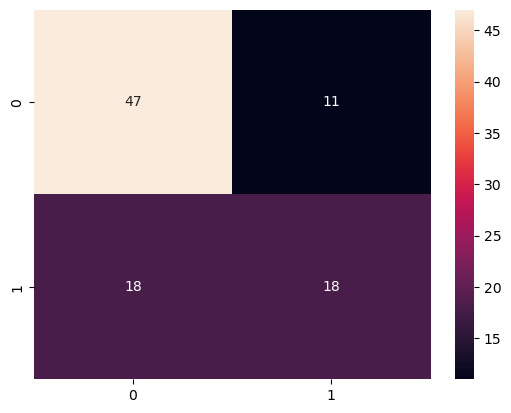

In [21]:
svm = grid_search.best_estimator_
y_svm_predictions = svm.predict(X_test)
estimators['svm'] = [svm, y_svm_predictions]

print(classification_report(y_test, y_svm_predictions))
sns.heatmap(confusion_matrix(y_test, y_svm_predictions), annot=True)

## <font color='grey'> 3.8 Ensemble naar keuze

#### 3.8.1 Hoe werkt het ensemble?

Met een ensemble methode kun je diverse modellen combineren. Het doel is om een ensemble te krijgen die alle voordelen van ieder model heeft en de zwaktes kan opheffen. Het gebruikt een meerderheidsstem. Voor het ensemble wat ik ga maken zou ik kiezen voor een gewogen meerderheidsstem. Met dat systeem worden de goede modellen wat zwaarder gewogen dan de slechtere modellen.

##### Keuze modellen
De modellen die ik heb gekozen zijn Random forest, SVM en K-nearest neighbors. Random forest heb ik gekozen omdat het goed werkt tegen overfitting. Dit komt omdat het meerdere decision trees maakt op steeds andere subsets van de data en verschillende features. SVM is erg effectief in het vinden van een goede beslissingsgrens en K-nearest-neighbors gebruik ik omdat het heel anders werkt dan de twee andere modellen. Ik ben benieuwd hoe deze modellen samen werken.

#### 3.8.2 Hyperparameter tuning

In [22]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier


rf = RandomForestClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)
knn = KNeighborsClassifier()

ensemble_model = VotingClassifier(estimators=[('rf', rf), ('svm', svm), ('knn', knn)], voting='soft')

param_grid = {'rf__n_estimators': [50, 100, 150],
              'rf__max_depth': [1, 3, 5],
              'svm__C': [0.1, 1, 10],
              'svm__kernel': ['linear', 'rbf'],
              'knn__n_neighbors': [3, 5, 7]}

f1_scorer = make_scorer(f1_score)
grid_search = GridSearchCV(ensemble_model, param_grid, cv=5, scoring=f1_scorer, n_jobs=-1)

grid_search.fit(X_train, y_train)

print(f'Beste parameters: {grid_search.best_params_}\nF1-score: {grid_search.best_score_}')

Beste parameters: {'knn__n_neighbors': 7, 'rf__max_depth': 5, 'rf__n_estimators': 50, 'svm__C': 0.1, 'svm__kernel': 'rbf'}
F1-score: 0.6434871794871795


#### 3.8.3 Resultaten

              precision    recall  f1-score   support

           0       0.72      0.79      0.75        58
           1       0.60      0.50      0.55        36

    accuracy                           0.68        94
   macro avg       0.66      0.65      0.65        94
weighted avg       0.67      0.68      0.67        94



<Axes: >

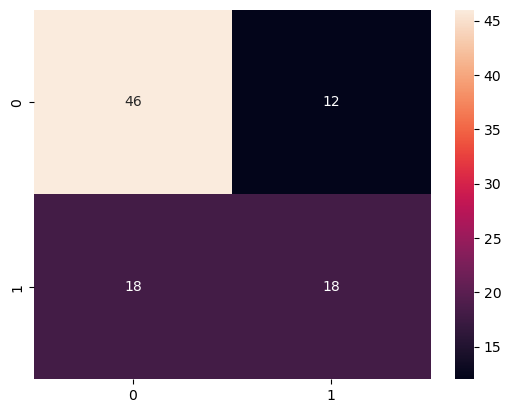

In [23]:
ensemble = grid_search.best_estimator_
y_ensemble_predictions = ensemble.predict(X_test)
estimators['ensemble'] = [ensemble, y_ensemble_predictions]


print(classification_report(y_test, y_ensemble_predictions))
sns.heatmap(confusion_matrix(y_test, y_ensemble_predictions), annot=True)

## <font color='grey'> 3.9 Model naar keuze

#### 3.9.1 Hoe werkt het model?

Naive Bayes is een classificatiemodel dat de Bayesiaanse theorie gebruikt. Ik zelf ben niet echt bekend met deze theorie maar het komt erop neer dat je aanneemt dat de kenmereken onderling onafhankelijk zijn. Aangezien in onze heatmap dit ook een beetje zo is dacht ik dat dit misschien wel een goed model zou zijn. De formule van het model is als volgt: $$P(C_k|x_1, x_2, \dots, x_n) = \frac{P(C_k)\prod_{i=1}^n P(x_i|C_k)}{\prod_{i=1}^n P(x_i)}$$

#### 3.9.2 Hyperparameter tuning

In [24]:
from sklearn.naive_bayes import GaussianNB

param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}

f1_scorer = make_scorer(f1_score)
grid_search = GridSearchCV(GaussianNB(), param_grid, cv=5, scoring=f1_scorer, n_jobs=-1)

grid_search.fit(X_train, y_train)

print(f'Beste parameters: {grid_search.best_params_}\nF1-score: {grid_search.best_score_}')

Beste parameters: {'var_smoothing': 1e-09}
F1-score: 0.6499870499870501


#### 3.9.3 Resultaten

              precision    recall  f1-score   support

           0       0.75      0.81      0.78        58
           1       0.65      0.56      0.60        36

    accuracy                           0.71        94
   macro avg       0.70      0.68      0.69        94
weighted avg       0.71      0.71      0.71        94



<Axes: >

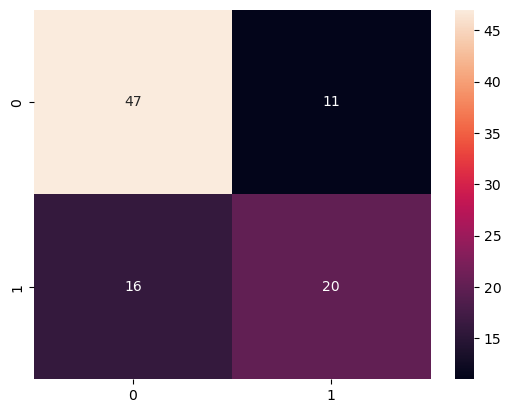

In [25]:
naive_bayes = grid_search.best_estimator_
y_naive_bayes_predictions = naive_bayes.predict(X_test)
estimators['naive_bayes'] = [naive_bayes, y_naive_bayes_predictions]

print(classification_report(y_test, y_naive_bayes_predictions))
sns.heatmap(confusion_matrix(y_test, y_naive_bayes_predictions), annot=True)

#### 3.9.4 Verwachtingen

De verwachtingen zijn niet echt uitgekomen. Ik had gehoopt dat het beter zou presteren dan al mijn andere modellen maar dat is niet uitgekomen. Ik weet niet precies waarom dit is omdat ik eigenlijk nog te weinig kennis heb over Naive Bayes.

# *Opdracht 4 Bevindingen*

## <font color='grey'> 4.1 Resultaten

Hieronder heb ik alle resultaten samengevat in een dataframe. Het dataframe bevat verschillende metrics zodat we een goed algemeen beeld krijgen van de modellen. Ook heb ik een dataframe gemaakt met de "beste" parameters. 

In [39]:
metrics = {'F1_score': f1_score, 
           'Accuracy': accuracy_score, 
           'Recall': recall_score, 
           'Precision': precision_score, 
           'AUC_ROC': roc_auc_score}

df_scores = pd.DataFrame(columns=['Model'] + [f"{metric}_test" for metric in metrics.keys()] + [f"{metric}_train" for metric in metrics.keys()])

for i, estimator in enumerate(estimators.keys()):
    row = {'Model': estimator}
    
    y_pred_test = estimators[estimator][1]
    y_pred_train = estimators[estimator][0].predict(X_train)
    
    for metric_name, metric_function in metrics.items():
        row[f"{metric_name}_test"] = metric_function(y_test, y_pred_test)
        row[f"{metric_name}_train"] = metric_function(y_train, y_pred_train)
        
    df_scores.loc[i] = row

display(df_scores.sort_values(by='F1_score_test', ascending=False))

,Model,F1_score_test,Accuracy_test,Recall_test,Precision_test,AUC_ROC_test,F1_score_train,Accuracy_train,Recall_train,Precision_train,AUC_ROC_train
0,logistic_regression,0.657534,0.734043,0.666667,0.648649,0.721264,0.707483,0.802752,0.787879,0.641975,0.798545
2,random_forest,0.597015,0.712766,0.555556,0.645161,0.682950,0.827068,0.894495,0.833333,0.820896,0.877193
7,naive_bayes,0.597015,0.712766,0.555556,0.645161,0.682950,0.671642,0.798165,0.681818,0.661765,0.765251
1,decision_tree,0.594595,0.680851,0.611111,0.578947,0.667625,0.695652,0.807339,0.727273,0.666667,0.784689
3,gradient_boosting,0.558824,0.680851,0.527778,0.593750,0.651820,1.000000,1.000000,1.000000,1.000000,1.000000
4,ada_boosting,0.557377,0.712766,0.472222,0.680000,0.667146,1.000000,1.000000,1.000000,1.000000,1.000000
5,svm,0.553846,0.691489,0.500000,0.620690,0.655172,0.580645,0.761468,0.545455,0.620690,0.700359
6,ensemble,0.545455,0.680851,0.500000,0.600000,0.646552,0.760331,0.866972,0.696970,0.836364,0.818880


## <font color='grey'> 4.2 Beste parameters

In [27]:
df_params = pd.DataFrame()

for model_name, (model, _) in estimators.items():
    params = model.get_params()
    params_series = pd.Series(params, name=model_name)
    df_params = pd.concat([df_params, params_series], axis=1)

df_params.fillna(value=pd.NA, inplace=True)

display(df_params)

,logistic_regression,decision_tree,random_forest,gradient_boosting,ada_boosting,svm,ensemble,naive_bayes
C,0.1,<NA>,<NA>,<NA>,<NA>,1,<NA>,<NA>
class_weight,balanced,balanced,balanced,<NA>,<NA>,<NA>,<NA>,<NA>
dual,False,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
fit_intercept,True,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
intercept_scaling,1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...
knn__n_neighbors,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,7,<NA>
knn__p,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2,<NA>
knn__weights,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,uniform,<NA>
priors,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [112]:
final_model = LogisticRegression(**logistic_regression.get_params())
final_model.fit(X,y)

df_results = df_test.copy()
df_results['Outcome'] = final_model.predict(df_test.drop('p_id', axis=1))
df_results[['p_id', 'Outcome']].to_csv('../DataDiabetes/results.csv', index=False)

## <font color='grey'> 4.3 Conclusie 

Logistic regression heeft de beste performance. Zowel op de trainingsdata als op de testdata. Toch vind ik het heel erg raar dat tijdens het trainen ik een andere score zie dan hier in de dataframe. Ik weet niet precies hoe dit komt.

Mijn score op kaggle is onzettend telleurstellend.. Met een score van $0.56074$ ben ik de laatste op de ranglijst. Ik denk dat dit komt doordat ik met te weinig data heb gewerkt. Al mijn modellen zijn getraind op ongeveer driehonderd rijen en ik heb al mijn hyperparameters gechecked met slechts nog minder rijen want ik heb natuurlijk een train test split gedaan. Ik heb te weinig tijd om mijn EDA opnieuw te doen en zal voortaan meer tijd daaraan besteden.

# *Opdracht 5 Conclusie*

## <font color='grey'> 5.1 Welke features zijn het belangrijkste?

Het is voor mij vrij moeilijk om te bepalen welke features echt belangrijk zijn. Je wil normaal aan de hand van de coëfficiënten van je model bekijken welke features het hoogste hebben. Dit is voor mij niet mogelijk omdat mijn model slechts een score heeft van $0.56074$. Dit betekent dat het mijn model het net iets beter doet t.o.v. willekeurig gokken. Wel kan ik zeggen dat voor mijn "slechtprestrerende model" de "Glucose" als hoogste coëfficiënt wordt beschouwd.

## <font color='grey'> 5.2 Zag je dit terug in de EDA?

Ik zag hier wel iets van terug in de EDA. Ik heb alle onrealistische data weggefilterd en daarna een correlatiematrix gemaakt. In die matrix zie ik ook dat "Glucose" de hoogste correlatie zou moeten hebben met "Outcome".

## <font color='grey'> 5.3 Welk advies zou je geven aan een arts?

Ik heb geen advies voor de arts aangezien mijn model gefaald heeft. Ik zou eigenlijk de EDA eerst opnieuw moeten doen. Ik moet dan betere keuzes maken op gebied van feature engineering. Als mijn model dan een goede performance heeft dan pas zou ik advies kunnen geven.

## <font color='grey'> 5.4 Welk model zou je adviseren aan een arts?

Ik heb geen flauw idee wat voor soort model ik zou adviseren aan de arts. Ik ben zeer telleurgesteld in mijn modellen. Natuurlijk heb ik vrij weinig data gebruikt om de modellen te trainen maar ik denk nog steeds dat tweehonderd rijen best goede resultaten zouden moeten opleveren. Er is waarschijnlijk meer misgegaan dan ik dacht en ik moet het nog eens doornemen.